## Tuning key gradient descent parameters

### Training an MNIST model with an incorrectly high learning rate

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer=keras.optimizers.RMSprop(1.),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4009 - loss: 2730.2151 - val_accuracy: 0.1635 - val_loss: 2.2513
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1762 - loss: 2.6350 - val_accuracy: 0.1532 - val_loss: 2.2449
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1829 - loss: 2.4820 - val_accuracy: 0.1812 - val_loss: 4.4764
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1714 - loss: 2.3500 - val_accuracy: 0.1883 - val_loss: 2.2451
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1776 - loss: 2.3832 - val_accuracy: 0.1644 - val_loss: 2.3696
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1782 - loss: 2.3514 - val_accuracy: 0.1821 - val_loss: 2.3091
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1847 - loss: 2.3772 - val_accuracy: 0.1813 - val_loss: 2.1920
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1740 - loss: 2.2897 - val_accuracy:

### The same model with a more appropriate learning rate

In [ ]:
model = Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer=keras.optimizers.RMSprop(0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8465 - loss: 0.8157 - val_accuracy: 0.9507 - val_loss: 0.1894
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9656 - loss: 0.1230 - val_accuracy: 0.9637 - val_loss: 0.1344
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9755 - loss: 0.0855 - val_accuracy: 0.9635 - val_loss: 0.1603
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9805 - loss: 0.0734 - val_accuracy: 0.9631 - val_loss: 0.1852
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9849 - loss: 0.0601 - val_accuracy: 0.9724 - val_loss: 0.1614
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9853 - loss: 0.0603 - val_accuracy: 0.9694 - val_loss: 0.1907
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9868 - loss: 0.0572 - val_accuracy: 0.9705 - val_loss: 0.2011
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9893 - loss: 0.0498 - val_accuracy: 0.

## Increasing model capacity

### A simple logistic regression on MNIST

In [ ]:
model = Sequential([
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history_small_model = model.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 1.0263 - val_accuracy: 0.9026 - val_loss: 0.3606
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.3681 - val_accuracy: 0.9126 - val_loss: 0.3107
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.3210 - val_accuracy: 0.9178 - val_loss: 0.2938
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9145 - loss: 0.3083 - val_accuracy: 0.9205 - val_loss: 0.2839
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9182 - loss: 0.2933 - val_accuracy: 0.9220 - val_loss: 0.2792
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2797 - val_accuracy: 0.9245 - val_loss: 0.2760
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.2790 - val_accuracy: 0.9255 - val_loss: 0.2734
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9231 - loss: 0.2804 - val_accu

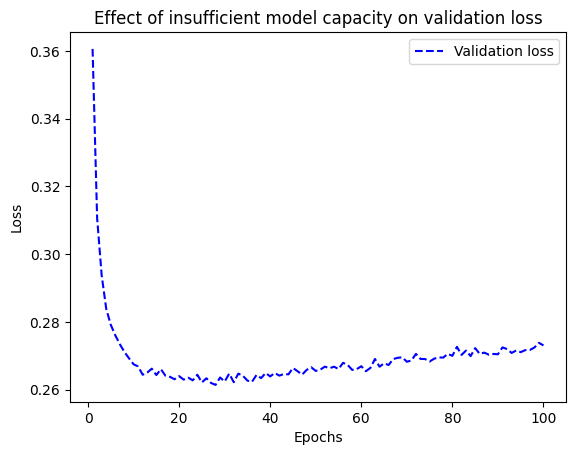

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 101)
plt.plot(epochs, val_loss, "b--",
  label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**It can’t seem to be able to overfit.Let’s try training a bigger model, one with two intermediate layers with 96 units
each**

In [ ]:
model = Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history_small_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8325 - loss: 0.6024 - val_accuracy: 0.9443 - val_loss: 0.1874
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9486 - loss: 0.1756 - val_accuracy: 0.9568 - val_loss: 0.1464
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9638 - loss: 0.1202 - val_accuracy: 0.9666 - val_loss: 0.1107
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9738 - loss: 0.0878 - val_accuracy: 0.9628 - val_loss: 0.1192
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.0695 - val_accuracy: 0.9693 - val_loss: 0.1028
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0617 - val_accuracy: 0.9719 - val_loss: 0.0913
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9727 - val_loss: 0.0926
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.

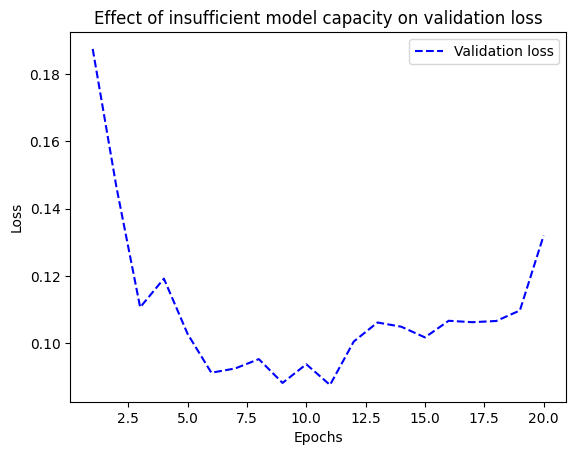

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
  label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Regularizing the model

### Original model

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6884 - loss: 0.5924 - val_accuracy: 0.8721 - val_loss: 0.3754
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8895 - loss: 0.3341 - val_accuracy: 0.8725 - val_loss: 0.3251
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9216 - loss: 0.2372 - val_accuracy: 0.8924 - val_loss: 0.2786
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9406 - loss: 0.1865 - val_accuracy: 0.8863 - val_loss: 0.2809
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9500 - loss: 0.1584 - val_accuracy: 0.8893 - val_loss: 0.2802
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9615 - loss: 0.1311 - val_accuracy: 0.8877 - val_loss: 0.2864
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9666 - loss: 0.1121 - val_accuracy: 0.8854 - val_loss: 0.2999
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9716 - loss: 0.0974 - val_accuracy: 0.8813 - v

### Version of the model with lower capacity

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_small = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6319 - loss: 0.6504 - val_accuracy: 0.6962 - val_loss: 0.5699
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7917 - loss: 0.5288 - val_accuracy: 0.7779 - val_loss: 0.5178
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8565 - loss: 0.4740 - val_accuracy: 0.8057 - val_loss: 0.4829
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8940 - loss: 0.4215 - val_accuracy: 0.8676 - val_loss: 0.4243
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9252 - loss: 0.3535 - val_accuracy: 0.8819 - val_loss: 0.3748
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9405 - loss: 0.2908 - val_accuracy: 0.8873 - val_loss: 0.3369
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9473 - loss: 0.2430 - val_accuracy: 0.8884 - val_loss: 0.3124
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9536 - loss: 0.2019 - val_accuracy: 0.8870 - v

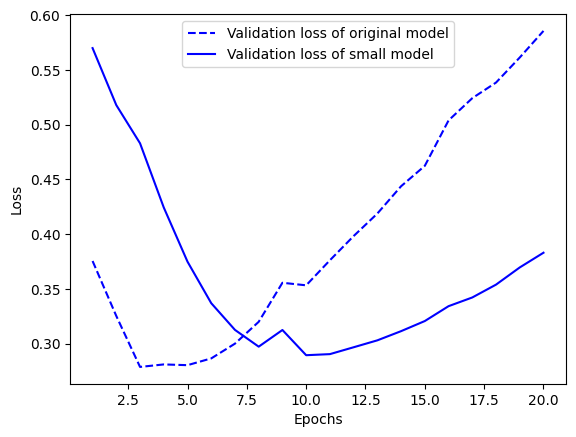

In [ ]:
val_loss_small = history_small.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",label="Validation loss of original model")
plt.plot(epochs, val_loss_small, "b",label="Validation loss of small model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Version of the model with higher capacity

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_larger = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.6420 - loss: 0.6466 - val_accuracy: 0.8491 - val_loss: 0.3779
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.8691 - loss: 0.3254 - val_accuracy: 0.8428 - val_loss: 0.3774
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.8983 - loss: 0.2520 - val_accuracy: 0.8765 - val_loss: 0.3014
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.9294 - loss: 0.1807 - val_accuracy: 0.8798 - val_loss: 0.2947
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.9545 - loss: 0.1290 - val_accuracy: 0.8814 - val_loss: 0.2940
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.9744 - loss: 0.0856 - val_accuracy: 0.8845 - val_loss: 0.2908
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.9880 - loss: 0.0532 - val_accuracy: 0.8846 - val_loss: 0.3113
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.9920 - loss: 0.0376 - val_accuracy:

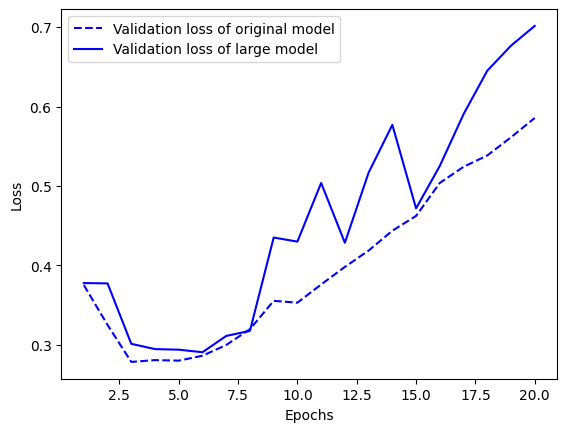

In [ ]:
val_loss_large = history_larger.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",label="Validation loss of original model")
plt.plot(epochs, val_loss_large, "b",label="Validation loss of large model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5857 - loss: 0.6684 - val_accuracy: 0.8305 - val_loss: 0.5552
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7625 - loss: 0.5467 - val_accuracy: 0.8682 - val_loss: 0.4665
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8312 - loss: 0.4683 - val_accuracy: 0.8587 - val_loss: 0.4164
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8613 - loss: 0.4098 - val_accuracy: 0.8810 - val_loss: 0.3607
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8888 - loss: 0.3561 - val_accuracy: 0.8879 - val_loss: 0.3310
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9000 - loss: 0.3184 - val_accuracy: 0.8659 - val_loss: 0.3253
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9183 - loss: 0.2857 - val_accuracy: 0.8877 - val_loss: 0.3121
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9252 - loss: 0.2596 - val_accuracy: 0.8881 - v

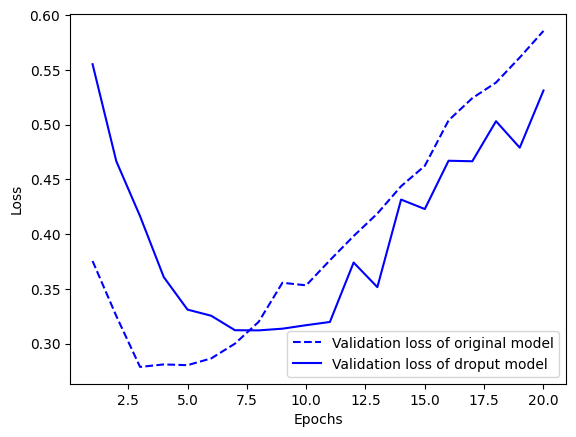

In [ ]:
val_loss_droput = history_dropout.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",label="Validation loss of original model")
plt.plot(epochs, val_loss_droput, "b",label="Validation loss of droput model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
(test_data, test_targets) = _

In [ ]:
test_data = vectorize_sequences(test_data)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_dropout_final = model.fit(
    train_data,
    train_labels,
    epochs=6,
    batch_size=512
)
results = model.evaluate(test_data, test_targets)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6084 - loss: 0.6397
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7982 - loss: 0.4615
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8622 - loss: 0.3617
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8924 - loss: 0.3056
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9102 - loss: 0.2744
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9233 - loss: 0.2395
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8851 - loss: 0.2874


In [ ]:
results

[0.2868751287460327, 0.8865200281143188]

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_dropout_final = model.fit(
    train_data,
    train_labels,
    epochs=3,
    batch_size=512
)
results = model.evaluate(test_data, test_targets)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7314 - loss: 0.5567
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9029 - loss: 0.2889
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9222 - loss: 0.2191
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8880 - loss: 0.2796


In [ ]:
results

[0.27865350246429443, 0.8893600106239319]